# give promotion to the employee by using given criteria

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\admin\Desktop\dataset\train_Hr.csv")

# data

In [3]:
data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
data.tail(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,1,0,51,0
54799,68093,Procurement,region_2,Master's & above,f,other,1,50,5.0,6,1,1,67,0
54800,39227,HR,region_11,Bachelor's,m,other,2,34,5.0,3,0,0,52,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [5]:
data.shape

(54808, 14)

In [6]:
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [7]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
e=data["employee_id"]
e

0        65438
1        65141
2         7513
3         2542
4        48945
         ...  
54803     3030
54804    74592
54805    13918
54806    13614
54807    51526
Name: employee_id, Length: 54808, dtype: int64

In [10]:
data=data.drop(["employee_id"],axis=1)
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [11]:
data.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [12]:
data.tail(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54798,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,1,0,51,0
54799,Procurement,region_2,Master's & above,f,other,1,50,5.0,6,1,1,67,0
54800,HR,region_11,Bachelor's,m,other,2,34,5.0,3,0,0,52,0
54801,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [13]:
data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [16]:
data.education=data.education.fillna("Below Secondary")

In [17]:
data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary      3214
Name: education, dtype: int64

In [18]:
data.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [19]:
data.previous_year_rating=data.previous_year_rating.fillna(1.0)

In [20]:
data.previous_year_rating.value_counts()

3.0    18618
5.0    11741
1.0    10347
4.0     9877
2.0     4225
Name: previous_year_rating, dtype: int64

In [21]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

# LABEL ENCODER

In [22]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [23]:
data.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [24]:
data.department=le.fit_transform(data.department)

In [25]:
data.department.value_counts()

7    16840
4    11348
8     7138
5     7138
0     5352
1     2536
2     2418
3     1039
6      999
Name: department, dtype: int64

In [26]:
data.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [27]:
data.region=le.fit_transform(data.region)

In [28]:
data.region.value_counts()

11    12343
14     6428
31     4843
6      2808
4      2648
18     2260
24     1935
28     1703
19     1659
7      1465
20     1318
2      1315
15     1175
21      994
25      945
10      874
12      850
5       827
17      819
8       796
29      766
30      690
23      657
32      655
1       648
0       610
16      508
3       500
33      420
13      411
22      346
27      292
26      269
9        31
Name: region, dtype: int64

In [29]:
data.education=le.fit_transform(data.education)
data.education.value_counts()

0    36669
2    14925
1     3214
Name: education, dtype: int64

In [30]:
data.gender=le.fit_transform(data.gender)
data.gender.value_counts()

1    38496
0    16312
Name: gender, dtype: int64

In [31]:
data.recruitment_channel=le.fit_transform(data.recruitment_channel)
data.recruitment_channel.value_counts()

0    30446
2    23220
1     1142
Name: recruitment_channel, dtype: int64

In [32]:
data.dtypes

department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

# test data

In [33]:
tdata=pd.read_csv(r"C:\Users\admin\Desktop\dataset\HR DATASET\test_Hr.csv")
tdata

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [34]:
tdata.shape

(23490, 13)

In [35]:
te_id=tdata["employee_id"]
te_id

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [36]:
tdata=tdata.drop(["employee_id"],axis=1)
tdata

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [37]:
tdata.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

# treat missing value

In [38]:
tdata.education=data.education.fillna("Below Secondary")

In [39]:
tdata.education.value_counts()

0    15646
2     6446
1     1398
Name: education, dtype: int64

In [40]:
tdata.previous_year_rating.value_counts()

3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

In [41]:
tdata.previous_year_rating=data.previous_year_rating.fillna(1.0)

In [42]:
tdata.previous_year_rating.value_counts()

3.0    7968
5.0    5069
1.0    4442
4.0    4231
2.0    1780
Name: previous_year_rating, dtype: int64

In [43]:
tdata.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

# LABEL ENCODING

In [44]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [45]:
tdata.department=le.fit_transform(tdata.department)
tdata.department.value_counts

<bound method IndexOpsMixin.value_counts of 0        8
1        2
2        7
3        5
4        1
        ..
23485    3
23486    8
23487    2
23488    5
23489    8
Name: department, Length: 23490, dtype: int32>

In [46]:
tdata.region=le.fit_transform(tdata.region)
tdata.region.value_counts()

11    5299
14    2739
31    1982
4     1167
6     1130
18    1011
24     844
28     775
19     710
20     595
7      590
2      571
15     516
25     433
21     414
10     410
8      361
5      350
29     342
17     337
12     326
30     298
23     273
32     269
1      269
0      238
16     219
3      215
33     180
13     179
27     155
22     147
26     126
9       20
Name: region, dtype: int64

In [47]:
tdata.education=le.fit_transform(tdata.education)
tdata.education.value_counts()

0    15646
2     6446
1     1398
Name: education, dtype: int64

In [48]:
tdata.recruitment_channel=le.fit_transform(tdata.recruitment_channel)
tdata.recruitment_channel.value_counts()

0    13078
2     9961
1      451
Name: recruitment_channel, dtype: int64

In [49]:
tdata.gender=le.fit_transform(tdata.gender)
tdata.gender.value_counts()

1    16596
0     6894
Name: gender, dtype: int64

# data visualisation (for train data)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
x=data.corr()
x

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.020592,0.054998,-0.030108,0.004732,0.014152,0.079162,-0.114089,0.059060,-0.088209,-0.002151,-0.251626,0.000130
region,-0.020592,1.000000,-0.005032,0.019730,-0.000920,-0.004590,-0.088918,-0.011669,-0.058939,-0.007664,0.000307,0.023572,0.008841
education,0.054998,-0.005032,1.000000,-0.017824,-0.004660,-0.039286,0.316659,0.063046,0.217755,0.001265,-0.001391,0.013519,0.023250
gender,-0.030108,0.019730,-0.017824,1.000000,0.006567,0.084501,-0.016293,-0.025558,-0.019675,-0.037400,0.002381,-0.024494,-0.011109
recruitment_channel,0.004732,-0.000920,-0.004660,0.006567,1.000000,-0.010405,-0.011400,0.004283,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,0.014152,-0.004590,-0.039286,0.084501,-0.010405,1.000000,-0.081278,-0.065435,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.079162,-0.088918,0.316659,-0.016293,-0.011400,-0.081278,1.000000,0.138656,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.114089,-0.011669,0.063046,-0.025558,0.004283,-0.065435,0.138656,1.000000,0.147385,0.302200,0.023694,0.064557,0.138192
length_of_service,0.059060,-0.058939,0.217755,-0.019675,-0.002887,-0.057275,0.657111,0.147385,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.088209,-0.007664,0.001265,-0.037400,-0.000297,-0.045576,-0.025592,0.302200,-0.077693,1.000000,0.097000,0.078391,0.221582


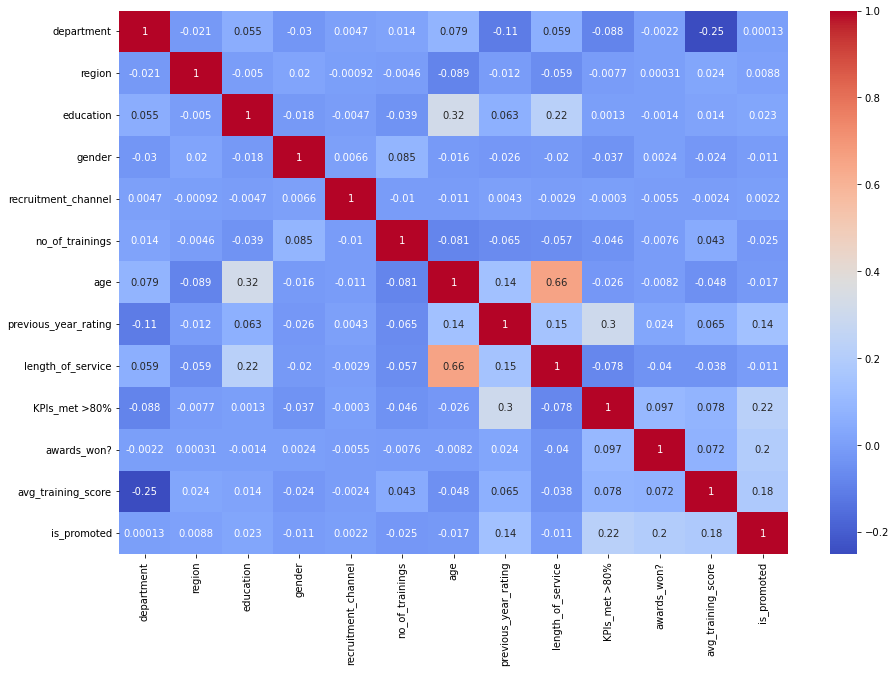

In [52]:
plt.figure(figsize=(15,10))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.show()

In [53]:
#v=sns.pairplot(data)
#v

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

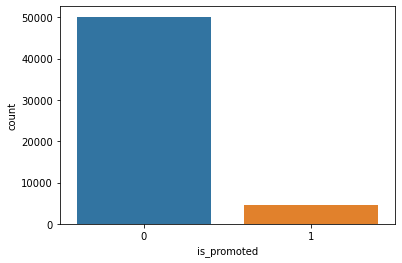

In [54]:
sns.countplot(x=data.is_promoted)

# impact of department on is_promoted column

<AxesSubplot:xlabel='department', ylabel='count'>

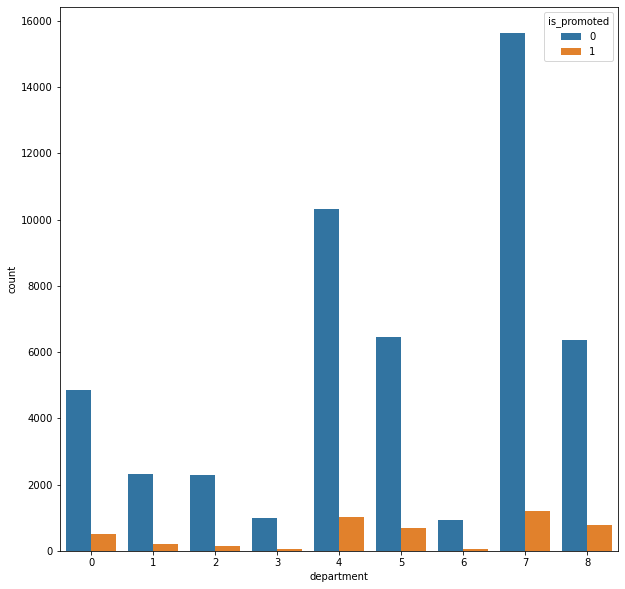

In [55]:
fig=plt.figure(figsize=(10,10))
sns.countplot(hue=data.is_promoted,x=data.department)

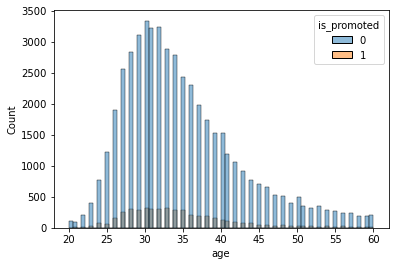

In [56]:
sns.histplot(hue=data.is_promoted,x=data.age)
plt.show()

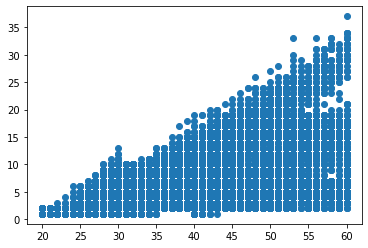

In [57]:
plt.scatter(data.age,data.length_of_service)

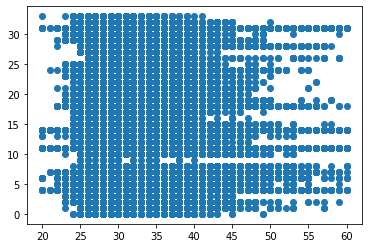

In [58]:
plt.scatter(data.age,data.region)

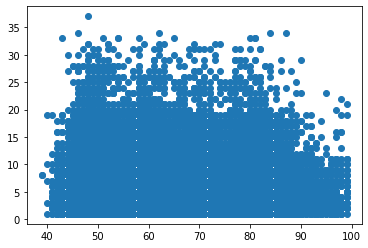

In [59]:
plt.scatter(data.avg_training_score,data.length_of_service)

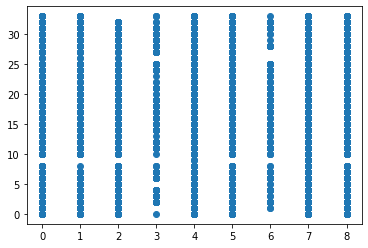

In [60]:
plt.scatter(data.department,data.region)

(array([10347.,     0.,  4225.,     0.,     0., 18618.,     0.,  9877.,
            0., 11741.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

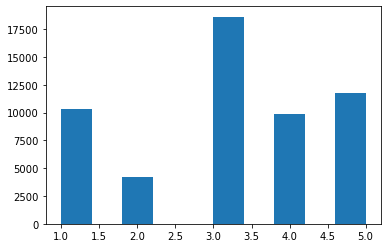

In [61]:
plt.hist(data.previous_year_rating)

(array([4.4378e+04, 7.9870e+03, 1.7760e+03, 4.6800e+02, 1.2800e+02,
        4.4000e+01, 1.2000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

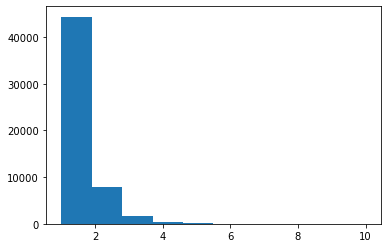

In [62]:
plt.hist(data.no_of_trainings)

(array([ 3073.,  6283.,  2292., 14478.,  8111.,  4738.,  3315.,  3149.,
         2761.,  6608.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <BarContainer object of 10 artists>)

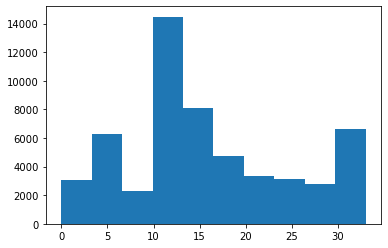

In [63]:
plt.hist(data.region)

# outlier handling

In [64]:
data.dtypes

department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

<AxesSubplot:>

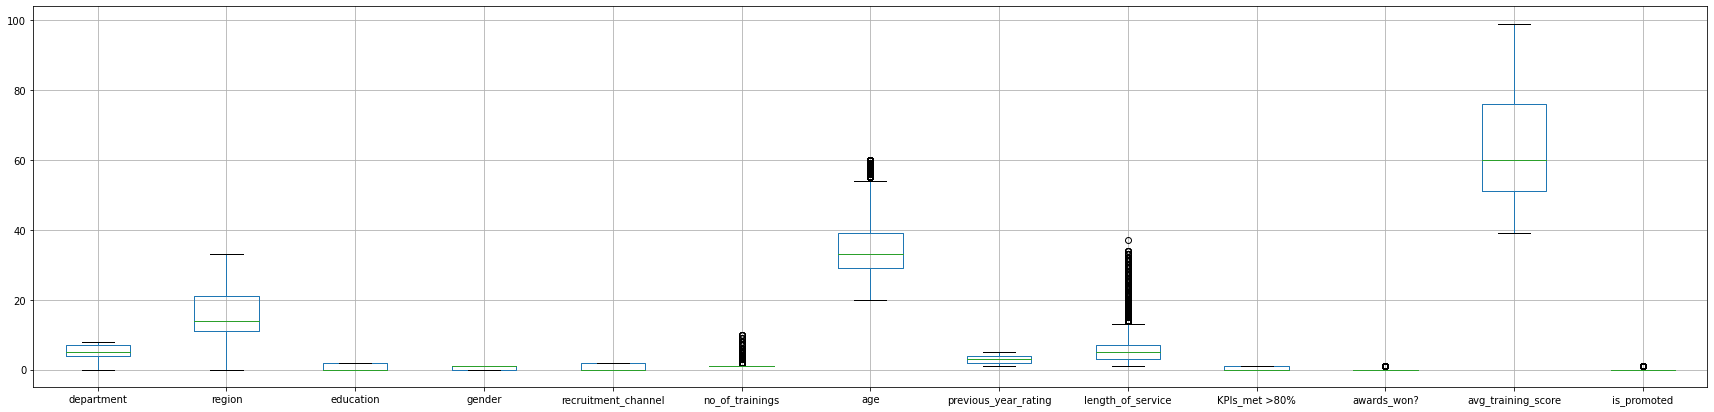

In [65]:
fig=plt.figure(figsize=(30,7))
data.boxplot()

# for age

<AxesSubplot:xlabel='age'>

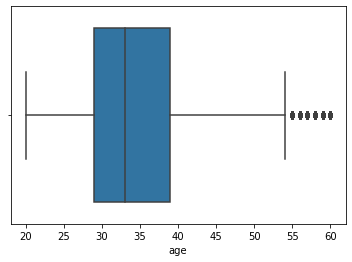

In [66]:
sns.boxplot(data.age)

<AxesSubplot:xlabel='age', ylabel='Density'>

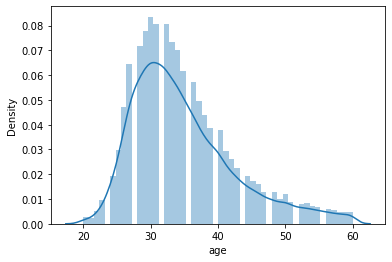

In [67]:
sns.distplot(data.age)

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <BarContainer object of 10 artists>)

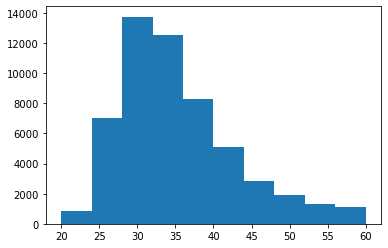

In [68]:
plt.hist(data.age)

In [69]:
age=data["age"]
age

0        35
1        30
2        34
3        39
4        45
         ..
54803    48
54804    37
54805    27
54806    29
54807    27
Name: age, Length: 54808, dtype: int64

In [70]:
outliers=[]
def detect_outliers(hr):
    threshold=2.5
    mean=np.mean(hr)  # mean of that perticular column
    std=np.std(hr)    # SD of that perticular column
    
    for i in hr:
        z_score=(i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [71]:
out=detect_outliers(age)
out

[57,
 59,
 56,
 60,
 54,
 54,
 58,
 57,
 58,
 57,
 55,
 59,
 57,
 60,
 57,
 57,
 59,
 56,
 54,
 58,
 60,
 55,
 57,
 56,
 57,
 59,
 58,
 54,
 60,
 57,
 57,
 54,
 60,
 57,
 57,
 55,
 56,
 54,
 54,
 60,
 55,
 58,
 54,
 54,
 56,
 54,
 59,
 54,
 54,
 56,
 54,
 54,
 56,
 58,
 54,
 57,
 55,
 57,
 59,
 57,
 60,
 60,
 60,
 60,
 54,
 54,
 58,
 55,
 59,
 55,
 60,
 57,
 55,
 55,
 60,
 56,
 57,
 56,
 54,
 58,
 56,
 60,
 55,
 54,
 57,
 57,
 59,
 55,
 55,
 54,
 60,
 57,
 57,
 55,
 56,
 57,
 56,
 54,
 55,
 59,
 56,
 59,
 55,
 54,
 59,
 60,
 54,
 58,
 60,
 58,
 60,
 55,
 60,
 55,
 54,
 57,
 60,
 57,
 56,
 55,
 57,
 54,
 57,
 54,
 59,
 56,
 54,
 58,
 54,
 54,
 60,
 58,
 57,
 58,
 57,
 58,
 57,
 55,
 57,
 56,
 56,
 54,
 59,
 54,
 54,
 55,
 60,
 58,
 55,
 58,
 60,
 55,
 54,
 54,
 58,
 57,
 55,
 59,
 59,
 54,
 56,
 60,
 60,
 58,
 55,
 54,
 54,
 54,
 55,
 58,
 54,
 55,
 56,
 55,
 59,
 58,
 58,
 60,
 59,
 59,
 59,
 56,
 56,
 57,
 54,
 55,
 56,
 54,
 60,
 56,
 55,
 55,
 57,
 55,
 55,
 60,
 57,
 54,
 54,
 60,


In [72]:
upperboundry=data["age"].mean()+3*data["age"].std()
lowerboundry=data["age"].mean()-3*data["age"].std()
print(lowerboundry,upperboundry)

11.82340788203259 57.784423091547914


In [73]:
data.loc[data["age"]>57.784423091547914,"age"]=57.784423091547914

<AxesSubplot:xlabel='age', ylabel='Density'>

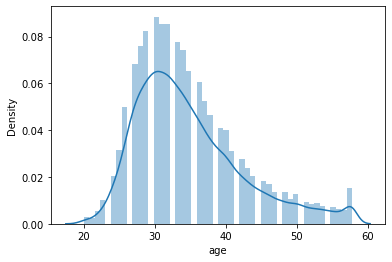

In [74]:
sns.distplot(data.age)


# for length of service

<AxesSubplot:xlabel='length_of_service'>

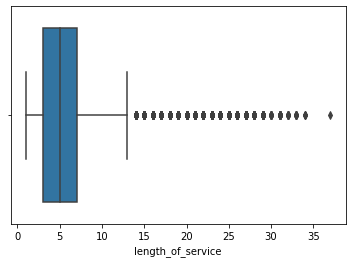

In [75]:
sns.boxplot(data.length_of_service)

(array([2.510e+04, 1.900e+04, 5.738e+03, 2.623e+03, 1.372e+03, 5.960e+02,
        2.270e+02, 9.600e+01, 5.100e+01, 5.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <BarContainer object of 10 artists>)

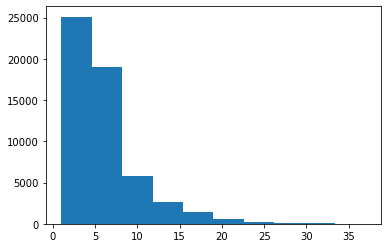

In [76]:
plt.hist(data.length_of_service)

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

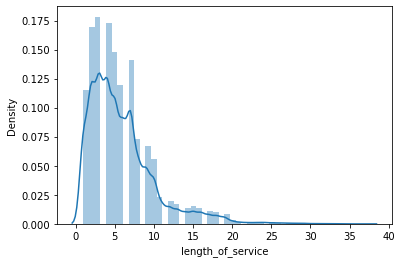

In [77]:
sns.distplot(data.length_of_service)

In [78]:

iqr=data.length_of_service.quantile(0.75)-data.length_of_service.quantile(0.25)
iqr

4.0

In [79]:
lb=data["length_of_service"].quantile(0.25)-(iqr*3) #last limit is 3 for covering more area we have to increase limit
ub=data["length_of_service"].quantile(0.75)+(iqr*3)
print(lb,ub)

-9.0 19.0


<AxesSubplot:ylabel='length_of_service'>

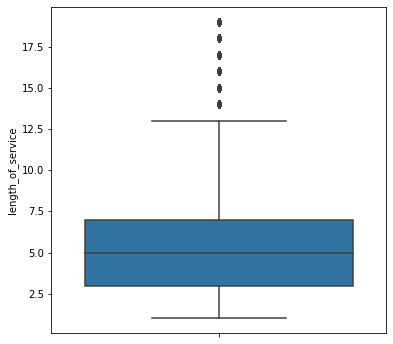

In [80]:
data.loc[data["length_of_service"]>19.0,"length_of_service"]=19.0
fig=plt.figure(figsize=(6,6))
sns.boxplot(data=data,y="length_of_service")

# for .avg_training_score

(array([  606., 11397.,  8466., 10883.,  4571.,  4652.,  4915.,  7154.,
         1801.,   363.]),
 array([39., 45., 51., 57., 63., 69., 75., 81., 87., 93., 99.]),
 <BarContainer object of 10 artists>)

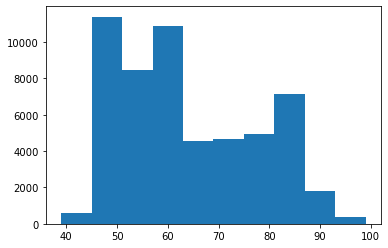

In [81]:
plt.hist(data.avg_training_score)

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

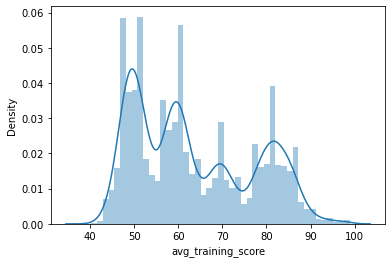

In [82]:
sns.distplot(data.avg_training_score)


<AxesSubplot:ylabel='avg_training_score'>

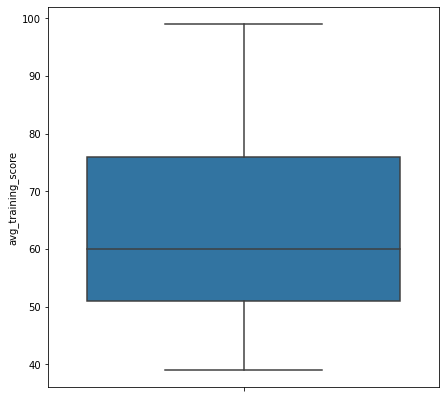

In [83]:
fig=plt.figure(figsize=(7,7))
sns.boxplot(data=data,y="avg_training_score")

# skewness treatment

In [84]:
data["avg_training_score"]==0

0        False
1        False
2        False
3        False
4        False
         ...  
54803    False
54804    False
54805    False
54806    False
54807    False
Name: avg_training_score, Length: 54808, dtype: bool

In [85]:
data.avg_training_score.skew()

0.45190808551707995

In [86]:
import numpy as np
v=np.log(data.avg_training_score)
v

0        3.891820
1        4.094345
2        3.912023
3        3.912023
4        4.290459
           ...   
54803    4.356709
54804    4.025352
54805    4.369448
54806    3.806662
54807    3.891820
Name: avg_training_score, Length: 54808, dtype: float64

(array([   95.,  2328., 11927.,  6119., 10883.,  4571.,  4652.,  7719.,
         5935.,   579.]),
 array([3.66356165, 3.75671747, 3.84987329, 3.94302911, 4.03618493,
        4.12934075, 4.22249657, 4.31565239, 4.40880821, 4.50196403,
        4.59511985]),
 <BarContainer object of 10 artists>)

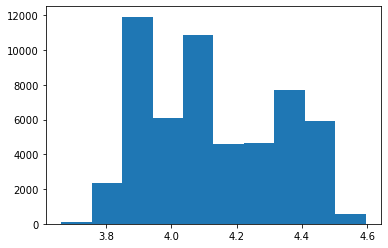

In [87]:
plt.hist(v)

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

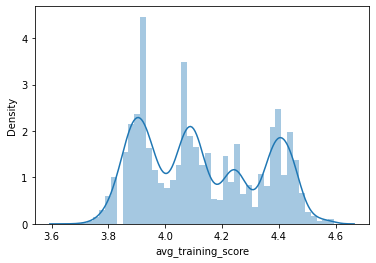

In [88]:
sns.distplot(v)

In [89]:
 data.avg_training_score.skew()

0.45190808551707995

# model bulding

In [90]:
data.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35.0,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30.0,5.0,4,0,0,60,0


In [91]:
tdata.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,2,1,2,1,24,5.0,1,1,0,77
1,2,28,0,0,0,1,31,5.0,5,0,0,51


In [92]:
d_x=data.iloc[:,0:-1]
d_y=data.iloc[:,-1]
test_x=tdata.iloc[:,0:]

In [93]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [94]:
lg.fit(d_x,d_y)

LogisticRegression()

In [95]:
p1=lg.predict(test_x)
p1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
p2=lg.predict_proba(test_x)
p2

array([[0.56416856, 0.43583144],
       [0.96862358, 0.03137642],
       [0.96830254, 0.03169746],
       ...,
       [0.93417918, 0.06582082],
       [0.98878357, 0.01121643],
       [0.9295713 , 0.0704287 ]])

In [97]:
df1=pd.DataFrame(p1,columns=["is_promoted"])
df1

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [98]:
df2=pd.DataFrame(te_id)
df2

,employee_id
0,8724
1,74430
2,72255
3,38562
4,64486
...,...
23485,53478
23486,25600
23487,45409
23488,1186


In [99]:
result=pd.concat([df2,df1],axis=1)
result

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [100]:
result.to_csv(r"C:\Users\admin\Desktop\dataset\Final_HR.csv ",index=False)

# Model on only train data to check performance

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_tr,x_te,y_tr,y_te=train_test_split(d_x,d_y,test_size=0.2,random_state=100)

In [103]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((43846, 12), (10962, 12), (43846,), (10962,))

# Logistic Regression

In [104]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [105]:
lg_p1=lg.predict(x_te)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [107]:
cf1=confusion_matrix(lg_p1,y_te)
cf1

array([[9904,  918],
       [  84,   56]], dtype=int64)

In [108]:
acc1=cf1.diagonal().sum()/cf1.sum()*100
acc1

90.8593322386426

In [109]:
print(classification_report(lg_p1,y_te))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     10822
           1       0.06      0.40      0.10       140

    accuracy                           0.91     10962
   macro avg       0.52      0.66      0.53     10962
weighted avg       0.98      0.91      0.94     10962



# decision tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [111]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [112]:
dt_p=dt.predict(x_te)

In [113]:
dt_cf=confusion_matrix(dt_p,y_te)
dt_cf

array([[9357,  529],
       [ 631,  445]], dtype=int64)

In [114]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

89.41798941798942

In [115]:
dt.feature_importances_

array([0.14564507, 0.10558407, 0.0275347 , 0.0288872 , 0.03462302,
       0.02674642, 0.1319059 , 0.05381189, 0.08461611, 0.04207881,
       0.02412912, 0.29443769])

In [116]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9886
           1       0.46      0.41      0.43      1076

    accuracy                           0.89     10962
   macro avg       0.70      0.68      0.69     10962
weighted avg       0.89      0.89      0.89     10962



# random forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [118]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [119]:
rf_p=rf.predict(x_te)

In [120]:
cf=confusion_matrix(rf_p,y_te)
cf

array([[9938,  695],
       [  50,  279]], dtype=int64)

In [121]:
rf_acc=cf.diagonal().sum()/cf.sum()*100

In [122]:
rf_acc

93.20379492793286

In [123]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10633
           1       0.29      0.85      0.43       329

    accuracy                           0.93     10962
   macro avg       0.64      0.89      0.70     10962
weighted avg       0.97      0.93      0.95     10962



# knn

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)

In [125]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=17)

In [126]:
k_p=knn.predict(x_te)

In [127]:
ck=confusion_matrix(k_p,y_te)
ck

array([[9977,  857],
       [  11,  117]], dtype=int64)

In [128]:
kacc=ck.diagonal().sum()/ck.sum()*100

In [129]:
kacc

92.08173690932313

In [130]:
print(classification_report(k_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10834
           1       0.12      0.91      0.21       128

    accuracy                           0.92     10962
   macro avg       0.56      0.92      0.59     10962
weighted avg       0.99      0.92      0.95     10962



In [131]:
lst=list()

# svc

In [132]:
from sklearn.svm import SVC
svc=SVC()

In [133]:
svc.fit(x_tr,y_tr)

SVC()

In [134]:
s_p=svc.predict(x_te)
s_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
cs=confusion_matrix(s_p,y_te)
cs

array([[9988,  974],
       [   0,    0]], dtype=int64)

In [136]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

91.11476008027732

In [137]:
print(classification_report(s_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     10962
           1       0.00      0.00      0.00         0

    accuracy                           0.91     10962
   macro avg       0.50      0.46      0.48     10962
weighted avg       1.00      0.91      0.95     10962



# adaboost

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [139]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [140]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [141]:
ad_p=adbo.predict(x_te)
ad_p

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [142]:
ad_cf=confusion_matrix(ad_p,y_te)
ad_cf

array([[9614,  591],
       [ 374,  383]], dtype=int64)

In [143]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

91.19686188651706

In [144]:
print(classification_report(ad_p,y_te))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10205
           1       0.39      0.51      0.44       757

    accuracy                           0.91     10962
   macro avg       0.68      0.72      0.70     10962
weighted avg       0.92      0.91      0.92     10962



# XGB CLASSIFIER

In [145]:
from xgboost import XGBRFClassifier
xgb=XGBRFClassifier()

In [146]:
xgb.fit(x_tr,y_tr)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...)

In [147]:
xgb_p=xgb.predict(x_te)

In [148]:
xgb_rsq=xgb.score(x_tr,y_tr)
xgb_rsq

0.9282944852438079

In [149]:
xgb_adr=xgb.score(x_tr,y_tr)
xgb_adr

0.9282944852438079

# naive bayes

In [203]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [204]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [205]:
n_p=nb.predict(x_te)
#n_p

In [206]:
nc=confusion_matrix(n_p,y_te)
nc

array([[9754,  841],
       [ 234,  133]], dtype=int64)

In [207]:
n_ac=nc.diagonal().sum()/nc.sum()*100
n_ac

90.19339536580915

In [208]:
print(classification_report(n_p,y_te))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     10595
           1       0.14      0.36      0.20       367

    accuracy                           0.90     10962
   macro avg       0.56      0.64      0.57     10962
weighted avg       0.95      0.90      0.92     10962



# class imbalance

oversampling-increase record under
undersampling-decrease record over

1-800    oversampling
0-200    undersampling

random 
imblearn
smote
nearmiss 


# 1.random undersampling

In [150]:
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [151]:
c_0,c_1=data["is_promoted"].value_counts()
c_0,c_1

(50140, 4668)

In [152]:
train_0=data[data["is_promoted"]==0]
train_1=data[data["is_promoted"]==1]

In [153]:
train_0.shape,train_1.shape

((50140, 13), (4668, 13))

In [154]:
class_0under=train_0.sample(c_1)

In [155]:
class0_1=pd.concat([class_0under,train_1],axis=0)
class0_1.head(1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
40968,5,11,2,1,0,1,56.0,3.0,4,1,0,76,0


In [156]:
class0_1.is_promoted.value_counts()

0    4668
1    4668
Name: is_promoted, dtype: int64

In [157]:
u_x=class0_1.iloc[:,0:-1]
u_y=class0_1.iloc[:,-1]

In [158]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((7468, 12), (1868, 12), (7468,), (1868,))

# logistic regression with random undersampling

In [159]:
lg.fit(u_x_train,u_y_train)

LogisticRegression()

In [160]:
p1=lg.predict(u_x_test)

In [161]:
c1=confusion_matrix(p1,u_y_test)
c1

array([[687, 256],
       [254, 671]], dtype=int64)

In [162]:
a1=c1.diagonal().sum()/c1.sum()*100
a1

72.69807280513919

In [163]:
print(classification_report(p1,u_y_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       943
           1       0.72      0.73      0.72       925

    accuracy                           0.73      1868
   macro avg       0.73      0.73      0.73      1868
weighted avg       0.73      0.73      0.73      1868



# decision tree

In [164]:
dt_p=dt.predict(u_x_test)

In [166]:
dt_c=confusion_matrix(dt_p,u_y_test)
dt_c

array([[929, 112],
       [ 12, 815]], dtype=int64)

In [167]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

93.36188436830835

In [168]:
print(classification_report(dt_p,u_y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1041
           1       0.88      0.99      0.93       827

    accuracy                           0.93      1868
   macro avg       0.93      0.94      0.93      1868
weighted avg       0.94      0.93      0.93      1868



# Random Forest with Under Sampling

In [169]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [170]:
rf_p=rf.predict(u_x_test)

In [171]:
rf_c=confusion_matrix(rf_p,u_y_test)
rf_c

array([[705, 149],
       [236, 778]], dtype=int64)

In [172]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

79.38972162740899

In [173]:
print(classification_report(rf_p,u_y_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       854
           1       0.84      0.77      0.80      1014

    accuracy                           0.79      1868
   macro avg       0.79      0.80      0.79      1868
weighted avg       0.80      0.79      0.79      1868



# Random OverSampling

In [181]:
c_1,c_0

(4668, 50140)

In [175]:
class_1over=train_1.sample(c_0,replace=True)

In [176]:
class1_0=pd.concat([class_1over,train_0],axis=0)

In [177]:
class1_0.head()
class1_0.shape

(100280, 13)

In [178]:
class1_0.is_promoted.value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

In [179]:
o_x=class1_0.iloc[:,1:-1]
o_y=class1_0.iloc[:,-1]

In [180]:
o_x_train,o_x_test,o_y_train,o_y_test=train_test_split(o_x,o_y,test_size=0.2,random_state=100)
o_x_train.shape,o_x_test.shape,o_y_train.shape,o_y_test.shape

((80224, 11), (20056, 11), (80224,), (20056,))

# Logistic Reg with Random Oversampling

In [182]:
lg.fit(o_x_train,o_y_train)

LogisticRegression()

In [183]:
op=lg.predict(o_x_test)

In [184]:
o_cf=confusion_matrix(op,o_y_test)

In [185]:
o_acc=o_cf.diagonal().sum()/o_cf.sum()*100
o_acc

72.11308336657359

In [186]:
print(classification_report(op,o_y_test))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      9908
           1       0.73      0.72      0.72     10148

    accuracy                           0.72     20056
   macro avg       0.72      0.72      0.72     20056
weighted avg       0.72      0.72      0.72     20056



# decision tree

In [187]:
dt.fit(o_x_train,o_y_train)

DecisionTreeClassifier()

In [189]:
dt_op=dt.predict(o_x_test)

In [197]:
dto_cf=confusion_matrix(dt_op,o_y_test)
dto_cf

array([[ 9209,     2],
       [  792, 10053]], dtype=int64)

In [198]:
o_acc=o_cf.diagonal().sum()/o_cf.sum()*100
o_acc

72.11308336657359

In [199]:
print(classification_report(dt_op,o_y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9211
           1       1.00      0.93      0.96     10845

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056



# knn

In [192]:
knn.fit(o_x_train,o_y_train)

KNeighborsClassifier(n_neighbors=17)

In [193]:
knn_op=dt.predict(o_x_test)

In [200]:
knno_cf=confusion_matrix(knn_op,o_y_test)

In [201]:
o_acc=o_cf.diagonal().sum()/o_cf.sum()*100
o_acc

72.11308336657359

In [202]:
print(classification_report(knn_op,o_y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9211
           1       1.00      0.93      0.96     10845

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056



# imblearn OVERSAMPLING

In [211]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [212]:
ab1=RandomOverSampler(random_state=42)

In [214]:
x1,y1=ab1.fit_resample(d_x,d_y)

In [215]:
x1.shape,y1.shape

((100280, 12), (100280,))

In [216]:
y1.value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

In [217]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x1,y1,test_size=0.2,random_state=50)

In [218]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((80224, 12), (20056, 12), (80224,), (20056,))

# Logistic Reg.imb OS

In [219]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [220]:
i_p1=lg.predict(x1_te)


In [222]:
i_cf1=confusion_matrix(i_p1,y1_te)
i_cf1

array([[7114, 2623],
       [2917, 7402]], dtype=int64)

In [224]:
i_acc=i_cf1.diagonal().sum()/i_cf1.sum()*100
i_acc

72.37734343837255

In [225]:
print(classification_report(i_p1,y1_te))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      9737
           1       0.74      0.72      0.73     10319

    accuracy                           0.72     20056
   macro avg       0.72      0.72      0.72     20056
weighted avg       0.72      0.72      0.72     20056



# decision tree

In [226]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [227]:
i_p1=dt.predict(x1_te)

In [228]:
i_cf1=confusion_matrix(i_p1,y1_te)
i_cf1

array([[ 9355,     0],
       [  676, 10025]], dtype=int64)

In [229]:
i_acc=i_cf1.diagonal().sum()/i_cf1.sum()*100
i_acc

96.62943757479059

In [230]:
print(classification_report(i_p1,y1_te))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      9355
           1       1.00      0.94      0.97     10701

    accuracy                           0.97     20056
   macro avg       0.97      0.97      0.97     20056
weighted avg       0.97      0.97      0.97     20056



# random forest

In [231]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [233]:
i_p1=rf.predict(x1_te)


In [234]:
i_cf1=confusion_matrix(i_p1,y1_te)
i_cf1

array([[ 9748,     0],
       [  283, 10025]], dtype=int64)

In [235]:
i_acc=i_cf1.diagonal().sum()/i_cf1.sum()*100
i_acc

98.58895093737536

In [236]:
print(classification_report(i_p1,y1_te))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9748
           1       1.00      0.97      0.99     10308

    accuracy                           0.99     20056
   macro avg       0.99      0.99      0.99     20056
weighted avg       0.99      0.99      0.99     20056



# ADABOOST Underdampling

In [237]:
from imblearn.under_sampling import RandomUnderSampler

In [239]:
ab2=RandomUnderSampler(sampling_strategy="all")

In [240]:
x2,y2=ab2.fit_resample(d_x,d_y)
x2.shape,y2.shape

((9336, 12), (9336,))

In [243]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=50)
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((7468, 12), (1868, 12), (7468,), (1868,))

# Log REG LMB US

# DT IMB US


In [253]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [254]:
i_p2=rf.predict(x2_te)

In [255]:
i_cf2=confusion_matrix(i_p2,y2_te)
i_cf2

array([[652, 119],
       [286, 811]], dtype=int64)

In [256]:
i_acc=i_cf2.diagonal().sum()/i_cf2.sum()*100
i_acc

78.31905781584582

In [257]:
print(classification_report(i_p2,y2_te))

              precision    recall  f1-score   support

           0       0.70      0.85      0.76       771
           1       0.87      0.74      0.80      1097

    accuracy                           0.78      1868
   macro avg       0.78      0.79      0.78      1868
weighted avg       0.80      0.78      0.78      1868



# RF IMB US

In [244]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [247]:
i_p2=rf.predict(x2_te)


In [250]:
i_cf2=confusion_matrix(i_p2,y2_te)
i_cf2

array([[652, 119],
       [286, 811]], dtype=int64)

In [251]:
i_acc=i_cf2.diagonal().sum()/i_cf2.sum()*100
i_acc

78.31905781584582

In [252]:
print(classification_report(i_p2,y2_te))

              precision    recall  f1-score   support

           0       0.70      0.85      0.76       771
           1       0.87      0.74      0.80      1097

    accuracy                           0.78      1868
   macro avg       0.78      0.79      0.78      1868
weighted avg       0.80      0.78      0.78      1868



# smote :Sinthetic minority over sampling technique

In [258]:
from imblearn.over_sampling import SMOTE

In [260]:
s=SMOTE()

In [262]:
x_s,y_s=s.fit_resample(d_x,d_y)

In [263]:
x_s.shape,y_s.shape

((100280, 12), (100280,))

In [266]:
x3_tr,x3_te,y3_tr,y3_te=train_test_split(x_s,y_s,test_size=0.2,random_state=50)
x3_tr.shape,x3_te.shape,y3_tr.shape,y3_te.shape

((80224, 12), (20056, 12), (80224,), (20056,))

# random forest os

In [267]:
rf.fit(x3_tr,y3_tr)

RandomForestClassifier()

In [268]:
i_p3=rf.predict(x3_te)

In [269]:
i_cf3=confusion_matrix(i_p3,y3_te)
i_cf3

array([[9564,  500],
       [ 467, 9525]], dtype=int64)

In [270]:
i_acc=i_cf3.diagonal().sum()/i_cf3.sum()*100
i_acc

95.17850019944156

In [271]:
print(classification_report(i_p3,y3_te))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10064
           1       0.95      0.95      0.95      9992

    accuracy                           0.95     20056
   macro avg       0.95      0.95      0.95     20056
weighted avg       0.95      0.95      0.95     20056



# NEARMISS UNDERSAMPLING TECHNIQUES

In [273]:
from imblearn.under_sampling import NearMiss

In [274]:
nm=NearMiss()

In [276]:
x_nm,y_nm=nm.fit_resample(d_x,d_y)

In [277]:
x_nm.shape,y_nm.shape

((9336, 12), (9336,))

In [278]:
x4_tr,x4_te,y4_tr,y4_te=train_test_split(x_nm,y_nm,test_size=0.2,random_state=50)
x4_tr.shape,x4_te.shape,y4_tr.shape,y4_te.shape

((7468, 12), (1868, 12), (7468,), (1868,))

In [ ]:
#random forest